## Exploring data with Pandas

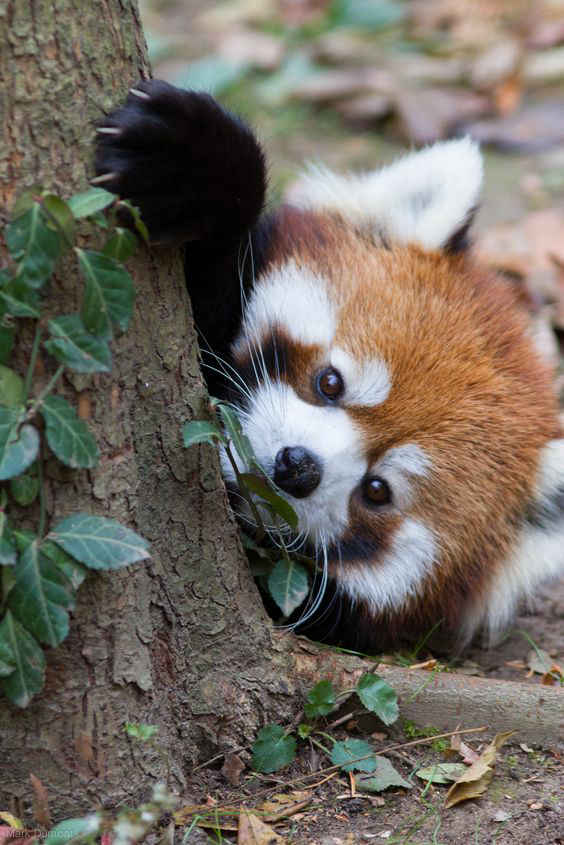

In [128]:
from PIL import Image
import urllib2
Image.open(urllib2.urlopen("https://s-media-cache-ak0.pinimg.com/564x/c4/e7/af/c4e7affe24f5185a396381f36df44fca.jpg"))

Red pandas are the superior panda.

In [2]:
#First import the panda library
#for convenience, I have renamed this to pd (it's a lot easier to type than panda)
import pandas as pd

In [5]:
#I then read in the data csv and saved it as variable 'music'
music = pd.read_csv("billboard.csv")

In [6]:
#to determine the shape of the dataframe, I called music.shape
music.shape
#the dataframe has 317 rows and 83 columns

(317, 83)

In [132]:
#to look at the types of each column, I called music.dtypes
music.dtypes


year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

For some reason the numbers for the first week are in integers but every other week is in floats. This may be because there are null values starting in Week 2. 

I'll take a look at that a few steps later, but first, I decided to rename the columns for easier parsing

In [8]:
music.columns

#To rename music.columns to something easier to parse through, I used the rename function (instead of typing out a list of 83 values)
#The columns initially had periods in them and given that 90% of the pandas library use periods in a function or call, 
#I changed these to underscores. I also removed all the 'x's in the week columns.

music.rename(columns=lambda x: x.replace('.','_'), inplace=True)
music.rename(columns=lambda x: x.replace('x',''), inplace=True)
music.columns

Index([u'year', u'artist_inverted', u'track', u'time', u'genre',
       u'date_entered', u'date_peaked', u'1st_week', u'2nd_week', u'3rd_week',
       u'4th_week', u'5th_week', u'6th_week', u'7th_week', u'8th_week',
       u'9th_week', u'10th_week', u'11th_week', u'12th_week', u'13th_week',
       u'14th_week', u'15th_week', u'16th_week', u'17th_week', u'18th_week',
       u'19th_week', u'20th_week', u'21st_week', u'22nd_week', u'23rd_week',
       u'24th_week', u'25th_week', u'26th_week', u'27th_week', u'28th_week',
       u'29th_week', u'30th_week', u'31st_week', u'32nd_week', u'33rd_week',
       u'34th_week', u'35th_week', u'36th_week', u'37th_week', u'38th_week',
       u'39th_week', u'40th_week', u'41st_week', u'42nd_week', u'43rd_week',
       u'44th_week', u'45th_week', u'46th_week', u'47th_week', u'48th_week',
       u'49th_week', u'50th_week', u'51st_week', u'52nd_week', u'53rd_week',
       u'54th_week', u'55th_week', u'56th_week', u'57th_week', u'58th_week',
       u'59th_w

In [10]:
#To get a better idea of what each column with information that WASN'T the weekly standing was like, I used .describe()
music.describe(include=["object"])

artist_inverted             track  time genre date_entered date_peaked
count              317               317   317   317          317         317
unique             228               316   126    10           68          53
top              Jay-Z  Where I Wanna Be  3:50  Rock   2000-01-29  2000-12-02
freq                 5                 2     9   137           11          17

It's interesting that there are 228 unique artists out of 317, and 316 unique songs out of 317.

In [11]:
#To determine WHY one song apparently appeared on the charts twice, I took a look at both values of "Where I Wanna Be" in the dataframe

music[music.track=="Where I Wanna Be"]

#Turns out two separate artists released two songs called "Where I Wanna Be" that entered the charts in 2000. 

year artist_inverted             track  time genre date_entered  \
118  2000   Jones, Donell  Where I Wanna Be  6:22  Rock   2000-04-22   
305  2000   Sheist, Shade  Where I Wanna Be  4:16   Rap   2000-11-11   

    date_peaked  1st_week  2nd_week  3rd_week    ...      67th_week  \
118  2000-07-08        81      71.0      65.0    ...            NaN   
305  2000-11-18        96      95.0      99.0    ...            NaN   

     68th_week  69th_week  70th_week  71st_week  72nd_week  73rd_week  \
118        NaN        NaN        NaN        NaN        NaN        NaN   
305        NaN        NaN        NaN        NaN        NaN        NaN   

     74th_week  75th_week  76th_week  
118        NaN        NaN        NaN  
305        NaN        NaN        NaN  

[2 rows x 83 columns]

### Assumption 1 about the data:
- The word "Wanna" appears more in songs in the year 2000 than the word "Baby". The word "Love" appears more frequently than both because it probably does every year.

In [198]:
wanna_string = music[music['track'].str.contains("Wanna")]
print "Wanna appeared",len(wanna_string),"times"

baby_string = music[music['track'].str.contains("Baby")]
print "Baby appeared",len(baby_string),"times"

love_string = music[music['track'].str.contains("Love")]
print "Love appeared",len(love_string),"times"

Wanna appeared 8 times
Baby appeared 5 times
Love appeared 24 times


### Assumption 1 was partially correct. 
- At least we know love won't let us down.

In [12]:
#Were the instances of "Love" appearing spread between genres?

music[music['track'].str.contains("Love")].sort("genre")

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


year   artist_inverted                               track  time  \
155  2000      Walker, Clay                   The Chain Of Love  5:03   
261  2000      Cagle, Chris              My Love Goes On And On  3:02   
257  2000    Worley, Darryl               When You Need My Love  3:35   
252  2000      Walker, Clay                   Live, Laugh, Love  4:06   
194  2000     Brooks & Dunn        You'll Always Be Loved By Me  2:58   
187  2000   Messina, Jo Dee                 Because You Love Me  3:50   
183  2000       Gill, Vince                     Feels Like Love  4:13   
156  2000  McBride, Martina               Love's The Only House  5:13   
142  2000     Jackson, Alan                     It Must Be Love  2:53   
301  2000         Anastacia                      I'm Outta Love  4:01   
129  2000      Fabian, Lara                   I Will Love Again  3:43   
84   2000               M2M               Don't Say You Love Me  3:41   
81   2000  Simpson, Jessica        I Think I'm In Love With You  3:32   
218  2000      Kumbia Kings                     U Don't Love Me  3:50   
190  2000       Hill, Faith                     Let's Make Love  4:11   
57   2000             Jay-Z  I Just Wanna Love U (Give It 2 Me)  3:50   
134  2000               Eve                       Love Is Blind  3:51   
298  2000      Price, Kelly                  Love Sets You Free  3:46   
102  2000             Avant                       My First Love  4:28   
68   2000       Jagged Edge                     He Can't Love U  3:30   
27   2000  Houston, Whitney                My Love Is Your Love  4:16   
19   2000             Dream                      He Loves U Not  3:43   
293  2000             Tamar          If You Don't Wanna Love Me  4:02   
2    2000     Savage Garden                  I Knew I Loved You  4:07   

       genre date_entered date_peaked  1st_week  2nd_week  3rd_week  \
155  Country   2000-04-15  2000-06-10        73      65.0      57.0   
261  Country   2000-10-21  2000-12-02        99      94.0      94.0   
257  Country   2000-06-17  2000-09-02        98      88.0      93.0   
252  Country   1999-12-04  2000-01-22        95      95.0      94.0   
194  Country   2000-06-10  2000-09-09        95      85.0      85.0   
187  Country   2000-01-29  2000-03-11        83      78.0      71.0   
183  Country   2000-09-02  2000-11-18        82      76.0      74.0   
156  Country   2000-02-05  2000-04-15        79      69.0      65.0   
142  Country   2000-06-24  2000-09-02        76      74.0      68.0   
301      Pop   2000-04-01  2000-04-01        92       NaN       NaN   
129      Pop   2000-06-10  2000-08-12        91      80.0      75.0   
84       Pop   1999-11-20  2000-01-08        72      53.0      62.0   
81       Pop   2000-07-01  2000-08-12        63      52.0      44.0   
218      R&B   2000-03-04  2000-03-18        81      64.0      62.0   
190      Rap   2000-08-12  2000-10-21        83      83.0      73.0   
57       Rap   2000-10-28  2000-12-30        58      45.0      35.0   
134      Rap   2000-01-08  2000-02-19        94      91.0      57.0   
298     Rock   2000-05-13  2000-05-20        92      91.0      98.0   
102     Rock   2000-11-04  2000-12-16        70      62.0      56.0   
68      Rock   1999-12-11  2000-01-08        54      32.0      17.0   
27      Rock   1999-09-04  2000-01-08        81      68.0      44.0   
19      Rock   2000-09-30  2000-12-30        99      92.0      81.0   
293     Rock   2000-03-25  2000-04-15        98      98.0      92.0   
2       Rock   1999-10-23  2000-01-29        71      48.0      43.0   

       ...      67th_week  68th_week  69th_week  70th_week  71st_week  \
155    ...            NaN        NaN        NaN        NaN        NaN   
261    ...            NaN        NaN        NaN        NaN        NaN   
257    ...            NaN        NaN        NaN        NaN        NaN   
252    ...            NaN        NaN        NaN        NaN        NaN   
194    ...            NaN        NaN  

Country has more instances of the word "Love" appearing in titles than Rock, which is surprising as Rock presumably has the most entries total

In [16]:
#I wanted to see how often certain artists appeared on the charts, so I counted the top 20 artists using value_counts()
music.artist_inverted.value_counts().head(20)

Jay-Z                   5
Houston, Whitney        4
Dixie Chicks, The       4
DMX                     3
Aguilera, Christina     3
McGraw, Tim             3
Backstreet Boys, The    3
Thomas, Carl            3
N'Sync                  3
Destiny's Child         3
SheDaisy                3
Sisqo                   3
Braxton, Toni           3
Limp Bizkit             3
Price, Kelly            3
Spears, Britney         3
Rimes, LeAnn            3
Eminem                  3
Lonestar                3
Martin, Ricky           3
Name: artist_inverted, dtype: int64

Jay-Z had 5 songs in the charts and Whitney Houston and the Dixie Chicks followed close behind with 4. There's a lot of artists who had 3 songs in the charts

### Assumption 2:

Based on statistically faulty reasoning (a.k.a: what I listed to in 2000), I'm assuming that Rock and Rap are the two most common genres.

In [17]:
music.genre.value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

### Assumption 2 was (also) partially correct

Unsurprisingly, the incredibly generic (heh) genre of "rock" had the most songs in the charts. Country music comes in second which proves you need a larger (and more representative) sample to make assumptions.


In [19]:
#I wanted to see what the longest and shortest songs were and so I used sort()
music.sort("time", ascending=False).head(10)

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


year    artist_inverted                               track  time  \
49   2000            Kenny G  Auld Lang Syne (The Millenium Mix)  7:50   
128  2000  Iglesias, Enrique                       Rhythm Divine  7:35   
100  2000           D'Angelo         Untitled (How Does It Feel)  7:10   
109  2000       Alice Deejay                    Better Off Alone  6:50   
118  2000      Jones, Donell                    Where I Wanna Be  6:22   
229  2000       Price, Kelly                           As We Lay  6:20   
282  2000    Hollister, Dave                          Can't Stay  6:17   
253  2000          Metallica               No Leaf Clover (Live)  5:43   
131  2000        Evans, Sara                         Born To Fly  5:36   
209  2000         Puff Daddy                         Best Friend  5:33   

           genre date_entered date_peaked  1st_week  2nd_week  3rd_week  \
49          Jazz   1999-12-25  2000-01-08        89      89.0       7.0   
128        Latin   1999-12-04  2000-01-22        90      84.0      79.0   
100          R&B   2000-01-22  2000-02-19        77      56.0      35.0   
109  Electronica   2000-04-08  2000-06-03        79      65.0      53.0   
118         Rock   2000-04-22  2000-07-08        81      71.0      65.0   
229         Rock   2000-07-15  2000-08-05        82      69.0      69.0   
282         Rock   2000-03-25  2000-03-25        84      84.0      93.0   
253         Rock   2000-02-12  2000-03-11        86      81.0      78.0   
131      Country   2000-10-21  2000-12-30        77      71.0      64.0   
209          Rap   2000-02-12  2000-02-19        65      59.0      62.0   

       ...      67th_week  68th_week  69th_week  70th_week  71st_week  \
49     ...            NaN        NaN        NaN        NaN        NaN   
128    ...            NaN        NaN        NaN        NaN        NaN   
100    ...            NaN        NaN        NaN        NaN        NaN   
109    ...            NaN        NaN        NaN        NaN        NaN   
118    ...            NaN        NaN        NaN        NaN        NaN   
229    ...            NaN        NaN        NaN        NaN        NaN   
282    ...            NaN        NaN        NaN        NaN        NaN   
253    ...            NaN        NaN        NaN        NaN        NaN   
131    ...            NaN        NaN        NaN        NaN        NaN   
209    ...            NaN        NaN        NaN        NaN        NaN   

     72nd_week  73rd_week  74th_week  75th_week  76th_week  
49         NaN        NaN        NaN        NaN        NaN  
128        NaN        NaN        NaN        NaN        NaN  
100        NaN        NaN        NaN        NaN        NaN  
109        NaN        NaN        NaN        NaN        NaN  
118        NaN        NaN        NaN        NaN        NaN  
229        NaN        NaN        NaN        NaN        NaN  
282        NaN        NaN        NaN        NaN        NaN  
253        NaN        NaN        NaN        NaN        NaN  
131        NaN        NaN        NaN        NaN        NaN  
209        NaN        NaN        NaN        NaN        NaN  

[10 rows x 83 columns]

In [20]:
#And the 10 shortest songs are...
music.sort("time").head(10)

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


year          artist_inverted                         track  time  \
166  2000            Jackson, Alan                    www.memory  2:36   
92   2000                  Dr. Dre              The Next Episode  2:38   
42   2000                Blink-182          All The Small Things  2:52   
158  2000            Tippin, Aaron                     Kiss This  2:53   
142  2000            Jackson, Alan               It Must Be Love  2:53   
151  2000          Lawrence, Tracy               Lessons Learned  2:55   
203  2000              Diffie, Joe         It's Always Somethin'  2:55   
275  2000  Clark Family Experience   Meanwhile Back At The Ranch  2:56   
236  2000            Brooks, Garth          Do What You Gotta Do  2:56   
194  2000            Brooks & Dunn  You'll Always Be Loved By Me  2:58   

       genre date_entered date_peaked  1st_week  2nd_week  3rd_week  \
166  Country   2000-11-04  2000-12-23        75      59.0      59.0   
92       Rap   2000-05-27  2000-07-29        78      67.0      58.0   
42      Rock   1999-12-04  2000-02-19        89      76.0      69.0   
158  Country   2000-08-26  2000-10-21        74      72.0      66.0   
142  Country   2000-06-24  2000-09-02        76      74.0      68.0   
151  Country   2000-01-29  2000-04-08        80      73.0      61.0   
203  Country   2000-08-12  2000-09-16        81      78.0      67.0   
275  Country   2000-11-18  2000-12-16        87      86.0      81.0   
236  Country   2000-02-19  2000-03-18        86      81.0      72.0   
194  Country   2000-06-10  2000-09-09        95      85.0      85.0   

       ...      67th_week  68th_week  69th_week  70th_week  71st_week  \
166    ...            NaN        NaN        NaN        NaN        NaN   
92     ...            NaN        NaN        NaN        NaN        NaN   
42     ...            NaN        NaN        NaN        NaN        NaN   
158    ...            NaN        NaN        NaN        NaN        NaN   
142    ...            NaN        NaN        NaN        NaN        NaN   
151    ...            NaN        NaN        NaN        NaN        NaN   
203    ...            NaN        NaN        NaN        NaN        NaN   
275    ...            NaN        NaN        NaN        NaN        NaN   
236    ...            NaN        NaN        NaN        NaN        NaN   
194    ...            NaN        NaN        NaN        NaN        NaN   

     72nd_week  73rd_week  74th_week  75th_week  76th_week  
166        NaN        NaN        NaN        NaN        NaN  
92         NaN        NaN        NaN        NaN        NaN  
42         NaN        NaN        NaN        NaN        NaN  
158        NaN        NaN        NaN        NaN        NaN  
142        NaN        NaN        NaN        NaN        NaN  
151        NaN        NaN        NaN        NaN        NaN  
203        NaN        NaN        NaN        NaN        NaN  
275        NaN        NaN        NaN        NaN        NaN  
236        NaN        NaN        NaN        NaN        NaN  
194        NaN        NaN        NaN        NaN        NaN  

[10 rows x 83 columns]

Unrelated: this is the first time I ever got to here [www.memory](https://www.youtube.com/watch?v=CXw5kyRPwS0) 

The chorus is a thing of beauty.

### The most important question to ask while exploring this data, however:
Did Britney appear on the charts more often than Christina?

Did N'Sync appear more times than the Backstreet Boys??

In [21]:
#To find out, I created a new dataframe that looked for the specific artist name. 
#I could have just counted instances of the name coming up but decided I wanted to see what tracks of theirs were on the chart
print music[music.artist_inverted=="N'Sync"].track
print music[music.artist_inverted== "Backstreet Boys, The"].track

#Ooh. Backstreet Boys and N'Sync both appear 3 times. 

print music[music.artist_inverted== "Spears, Britney"].track
print music[music.artist_inverted== "Aguilera, Christina"].track

#Christina and Britney ALSO both appear three times. This feels rigged.

#Just to make sure there's no issues with my call function, I also looked for Sugar Ray, another '00 classic.

print music[music.artist_inverted== "Sugar Ray"].track

10      It's Gonna Be Me
30           Bye Bye Bye
37    This I Promise You
Name: track, dtype: object
39     Show Me The Meaning Of Being Lonely
52                       Shape Of My Heart
121                                The One
Name: track, dtype: object
51                Oops!.. I Did It Again
63    From The Bottom Of My Broken Heart
93                                 Lucky
Name: track, dtype: object
4     Come On Over Baby (All I Want Is You)
11                        What A Girl Wants
26                            I Turn To You
Name: track, dtype: object
116    Falls Apart
Name: track, dtype: object


Next, I wanted to see if any artists were mislabelled as being in the wrong genre


In [22]:
#To do this, I created new dataframes just looking at variables related to artists I had chosen at random.
#I wanted to count the instances of their appearance in a genre to make sure they weren't being put into different genres for different songs
print music[music.artist_inverted== "D'Angelo"].genre.value_counts().head()
print music[music.artist_inverted== "TLC"].genre.value_counts().head()
print music[music.artist_inverted== "Bloodhound Gang"].genre.value_counts().head()

R&B    2
Name: genre, dtype: int64
Rock    1
Name: genre, dtype: int64
R&B    1
Name: genre, dtype: int64


Looks like they did. 

While D'Angelo is almost definitely R&B, TLC has been labelled as Rock and Bloodhound Gang has been labelled as R&B.
This is a flaw in the data. Even though genres are quite subjective, TLC is usually categorized as R&B while the Bloodhound Gang are usually categorized as Rock. When record labels, etc. are trying to make determinations about which genre does better, this becomes quite an unreliable measure if the genres are poorly classified.

In [23]:
#To see if there are other mis-genre'd artists, I used groupby to look at artists who had been placed in certain genres (and how many times they had been for artists with multiple songs)
print "R&B"
print music.groupby('genre').artist_inverted.value_counts()["R&B"]
##Aaron Carter, Billboard charts? Really?
print "\n","Jazz"
print music.groupby('genre').artist_inverted.value_counts()["Jazz"]
#To make the outputs easy to read, I added a new line with the genre title I was calling
print "\n","Pop"

print music.groupby('genre').artist_inverted.value_counts()["Pop"]
#If neither N'Sync nor Backstreet Boys appear in this list, does this mean they have been classified as Rock?

R&B
artist_inverted
D'Angelo            2
Levert, Gerald      2
2Ge+her             1
Baha Men            1
Bloodhound Gang     1
Carter, Aaron       1
Fragma              1
Ghostface Killah    1
Guy                 1
Ideal               1
J-Shin              1
Kelis               1
Kumbia Kings        1
Larrieux, Amel      1
Lucy Pearl          1
Nas                 1
Nu Flavor           1
Profyle             1
Splender            1
Stone, Angie        1
Wright, Chely       1
Name: artist_inverted, dtype: int64

Jazz
artist_inverted
Kenny G    1
Name: artist_inverted, dtype: int64

Pop
artist_inverted
M2M                 2
A*Teens             1
Anastacia           1
Blaque              1
Fabian, Lara        1
Hoku                1
Moore, Mandy        1
Simpson, Jessica    1
Name: artist_inverted, dtype: int64


In [24]:
print music[music.artist_inverted== "N'Sync"].genre.value_counts().head()
print music[music.artist_inverted== "Backstreet Boys, The"].genre.value_counts().head()

#Yep. They were both classified as Rock. 11-year-old me has a lot of things to say to you, Billboard.

Rock    3
Name: genre, dtype: int64
Rock    3
Name: genre, dtype: int64


In [26]:
#Instead of getting bogged down in the details of terrible genre assignment, I took a look at what data was missing
music.isnull().sum()

#There are no null values in week 1, and 5 in week 2. 

year                 0
artist_inverted      0
track                0
time                 0
genre                0
date_entered         0
date_peaked          0
1st_week             0
2nd_week             5
3rd_week            10
4th_week            17
5th_week            25
6th_week            37
7th_week            48
8th_week            57
9th_week            64
10th_week           73
11th_week           81
12th_week           95
13th_week          107
14th_week          113
15th_week          120
16th_week          135
17th_week          140
18th_week          151
19th_week          161
20th_week          171
21st_week          252
22nd_week          262
23rd_week          269
                  ... 
47th_week          312
48th_week          313
49th_week          313
50th_week          313
51st_week          313
52nd_week          313
53rd_week          313
54th_week          315
55th_week          315
56th_week          315
57th_week          315
58th_week          315
59th_week  

#### Data quality

There are several columns with no data values filled in at all. The 66th week through the 76th week appear to have no data in them whatsoever. Given that this dataframe only represents the year 2000, it'll probably be much cleaner to remove those rows completely and just look at the 52 weeks in 2000. 


In [43]:
#on the other hand, the null values can come in useful to see how many weeks songs stayed on the charts
#to do that, I created a new column called "weeks on chart" which removed the total sum of null values from the total number of columns
music['weeksonchart'] = 76 - music.isnull().sum(axis=1)

year      artist_inverted  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98�   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Houston, Whitney   
28   2000                  Joe   
29   2000      Jordan, Montell   
..    ...                  ...   
287  2000              2Ge+her   
288  2000       Madison Avenue   
289  2000                  Eve   
290  2000          Limp Bizkit   
291  2000      Spencer, Tracie   
292  2000            Nu Flavor   
293  2000                Tamar   
294  2000       Levert, Gerald   
295  2000           Hart, Beth   
296  2000          Diffie, Joe   
297  2000      Funkmaster Flex   
298  2000         Price, Kelly   
299  2000             En Vogue   
300  2000          Herndon, Ty   
301  2000            Anastacia   
302  2000                Trina   
303  2000              Lil' Mo   
304  2000              A*Teens   
305  2000        Sheist, Shade   
306  2000           De La Soul   
307  2000       Larrieux, Amel   
308  2000        Braxton, Toni   
309  2000              Tuesday   
310  2000            LL Cool J   
311  2000             Master P   
312  2000     Ghostface Killah   
313  2000          Smith, Will   
314  2000        Zombie Nation   
315  2000       Eastsidaz, The   
316  2000               Fragma   

                                                 track  time        genre  \
0                             Independent Women Part I  3:38         Rock   
1                                         Maria, Maria  4:18         Rock   
2                                   I Knew I Loved You  4:07         Rock   
3                                                Music  3:45         Rock   
4                Come On Over Baby (All I Want Is You)  3:38         Rock   
5                                Doesn't Really Matter  4:17         Rock   
6                                          Say My Name  4:31         Rock   
7                                          Be With You  3:36        Latin   
8                                           Incomplete  3:52         Rock   
9                                               Amazed  4:25      Country   
10                                    It's Gonna Be Me  3:10         Rock   
11                                   What A Girl Wants  3:18         Rock   
12                                 Everything You Want  4:01         Rock   
13                                 With Arms Wide Open  3:52         Rock   
14                                           Try Again  4:03         Rock   
15                                                Bent  4:12         Rock   
16                               Thank God I Found You  4:14         Rock   
17                                             Breathe  4:04          Rap   
18                   Case Of The Ex (Whatcha Gonna Do)  3:50         Rock   
19                                      He Loves U Not  3:43         Rock   
20                                He Wasn't Man Enough  4:21         Rock   
21                                      You Sang To Me  3:50        Latin   
22                  Give Me Just One Night (Una Noche)  3:24         Rock   
23                                     Jumpin' J

In [47]:
#To see which songs stayed on the charts for the longest, I sorted by the new column "weeksonchart"
music.sort("weeksonchart", ascending = False).head(10)

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


year   artist_inverted                       track  time    genre  \
46  2000             Creed                      Higher  5:16     Rock   
9   2000          Lonestar                      Amazed  4:25  Country   
24  2000      3 Doors Down                  Kryptonite  3:53     Rock   
17  2000       Hill, Faith                     Breathe  4:04      Rap   
13  2000             Creed         With Arms Wide Open  3:52     Rock   
28  2000               Joe                I Wanna Know  4:57     Rock   
12  2000  Vertical Horizon         Everything You Want  4:01     Rock   
15  2000   matchbox twenty                        Bent  4:12     Rock   
20  2000     Braxton, Toni        He Wasn't Man Enough  4:21     Rock   
47  2000             Nelly  (Hot S**t) Country Grammar  4:17      Rap   

   date_entered date_peaked  1st_week  2nd_week  3rd_week      ...       \
46   1999-09-11  2000-07-22        81      77.0      73.0      ...        
9    1999-06-05  2000-03-04        81      54.0      44.0      ...        
24   2000-04-08  2000-11-11        81      70.0      68.0      ...        
17   1999-11-06  2000-04-22        81      68.0      62.0      ...        
13   2000-05-13  2000-11-11        84      78.0      76.0      ...        
28   2000-01-01  2000-07-01        94      86.0      69.0      ...        
12   2000-01-22  2000-07-15        70      61.0      53.0      ...        
15   2000-04-29  2000-07-22        60      37.0      29.0      ...        
20   2000-03-18  2000-05-06        63      55.0      48.0      ...        
47   2000-04-29  2000-09-16       100      99.0      96.0      ...        

    68th_week  69th_week  70th_week  71st_week  72nd_week  73rd_week  \
46        NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
24        NaN        NaN        NaN        NaN        NaN        NaN   
17        NaN        NaN        NaN        NaN        NaN        NaN   
13        NaN        NaN        NaN        NaN        NaN        NaN   
28        NaN        NaN        NaN        NaN        NaN        NaN   
12        NaN        NaN        NaN        NaN        NaN        NaN   
15        NaN        NaN        NaN        NaN        NaN        NaN   
20        NaN        NaN        NaN        NaN        NaN        NaN   
47        NaN        NaN        NaN        NaN        NaN        NaN   

    74th_week  75th_week  76th_week  weeksonchart  
46        NaN        NaN        NaN            57  
9         NaN        NaN        NaN            55  
24        NaN        NaN        NaN            53  
17        NaN        NaN        NaN            53  
13        NaN        NaN        NaN            47  
28        NaN        NaN        NaN            44  
12        NaN        NaN        NaN            41  
15        NaN        NaN        NaN            39  
20        NaN        NaN        NaN            37  
47        NaN        NaN        NaN            34  

[10 rows x 84 columns]

Creed's "Higher" stayed on the charts for the longest (with another song by them close behind). Songs classified as Rock also seem to have stayed on the charts the longest.

In [48]:
#To make the rows easier to parse (now that I'd used the null values to look at what stayed on the charts the longest, I replaced all Null values with 0.
music.fillna(value='0', inplace=True) 

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [59]:
#Assuming that things have been classified correctly by genre, I'd like to see if certain genres enter the charts at a higher number than others
music.groupby("genre").mean().sort("1st_week")


/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


year   1st_week  weeksonchart
genre                                       
Reggae       2000.0  72.000000     15.000000
Latin        2000.0  73.222222     19.222222
Gospel       2000.0  76.000000     20.000000
Rock         2000.0  76.116788     18.883212
Pop          2000.0  79.222222     15.222222
Country      2000.0  82.405405     16.216216
R&B          2000.0  84.086957     11.347826
Electronica  2000.0  84.500000     18.000000
Rap          2000.0  85.172414     14.431034
Jazz         2000.0  89.000000      5.000000

It looks like Reggae, Latin, and Gospel came in at the lowest entries overall, but that's probably because there were very few songs in any of those genres (thus skewing the mean). Of the two most popular genres, it looks like Rock enters the charts closer to the top than Country. Rock songs also spend more time on the charts than Country.

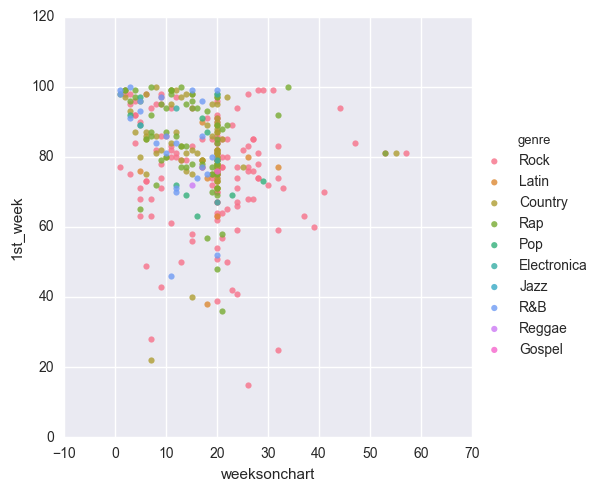

In [60]:
#I decided to try and plot the number of weeks each song spent on the charts against what number they came in at
sns.lmplot(x = 'weeksonchart',y ='1st_week', hue = 'genre', data = music, fit_reg=False)

This chart isn't the most useful, but it does look like there's more Rock songs that entered the charts much closer to the top than any other genres. There's also a cluster of songs that suddenly leave the charts after 20 weeks on them which suggests this may be another limitation with the data (or that 20 weeks is the shelflife of a song on a top 100 chart)

In [49]:
#I also decided to take a look at what entered the charts and what peaked in the charts on the week of my birthday
print music[music.date_entered=="2000-04-01"]
print music[music.date_peaked=="2000-04-01"]

#It wasn't a spectacular week

     year    artist_inverted              track  time    genre date_entered  \
7    2000  Iglesias, Enrique        Be With You  3:36    Latin   2000-04-01   
77   2000           Westlife     Swear It Again  4:07     Rock   2000-04-01   
195  2000     Chesney, Kenny  What I Need To Do  4:05  Country   2000-04-01   
216  2000   Simpson, Jessica      Where You Are  3:51     Rock   2000-04-01   
217  2000                M2M      Mirror Mirror  3:19      Pop   2000-04-01   
277  2000   Yearwood, Trisha    Real Live Woman  3:55  Country   2000-04-01   
301  2000          Anastacia     I'm Outta Love  4:01      Pop   2000-04-01   

    date_peaked  1st_week 2nd_week 3rd_week     ...      68th_week 69th_week  \
7    2000-06-24        63       45       34     ...              0         0   
77   2000-07-01        96       82       66     ...              0         0   
195  2000-06-10        79       74       68     ...              0         0   
216  2000-04-15        73       66       62    

### Practical applications

Assuming you're not just interested in the fact that Westlife's Swear It Again (with an incorrect genre applied to it) entered the charts on the same week as my birthday, here's a practical use of some of this data. 

We're all in a nostalgic kick, wishing we were still lip syncing to Britney or Christina (this dataset is equal opportunity), so why wouldn't record companies take this time to compile a nostalgia Spotify playlist (or release a compilation tape for maximum nostalgia points) with the songs that were number 1 for the longest in the year 2000?

In [50]:
for i in range(317):
    one_week = 0
    for j in range(83):
        if music.iloc[i,j] == 1:
            one_week = one_week + 1
    if one_week > 0:
        print music.iloc[i,1], 'was #1 for ',one_week," weeks with",music.iloc[i,2]
    

Destiny's Child was #1 for  11  weeks with Independent Women Part I
Santana was #1 for  10  weeks with Maria, Maria
Savage Garden was #1 for  4  weeks with I Knew I Loved You
Madonna was #1 for  4  weeks with Music
Aguilera, Christina was #1 for  4  weeks with Come On Over Baby (All I Want Is You)
Janet was #1 for  3  weeks with Doesn't Really Matter
Destiny's Child was #1 for  3  weeks with Say My Name
Iglesias, Enrique was #1 for  3  weeks with Be With You
Sisqo was #1 for  2  weeks with Incomplete
Lonestar was #1 for  2  weeks with Amazed
N'Sync was #1 for  2  weeks with It's Gonna Be Me
Aguilera, Christina was #1 for  2  weeks with What A Girl Wants
Vertical Horizon was #1 for  1  weeks with Everything You Want
Creed was #1 for  1  weeks with With Arms Wide Open
Aaliyah was #1 for  1  weeks with Try Again
matchbox twenty was #1 for  1  weeks with Bent
Carey, Mariah was #1 for  1  weeks with Thank God I Found You
